In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from datetime import datetime

In [7]:
Tickets= pd.read_csv("/home/cjdavis/Downloads/il_parking_tickets_20180822/data/processed/parking_tickets.csv", nrows = 1e6)

/home/cjdavis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
def get_location_on_street(row):
    street_location = row["violation_location"].split(" ")
    if street_location[0] == "":
        street_location[0] = 0
    return int(street_location[0])
def get_street_name(row):
    street_name_list = row["violation_location"].split(" ")
    street_name = " ".join(street_name_list[1:])
    return street_name
def get_block_number(row):
    block_number = row["address"].split(" ")
    try:
        block = int(block_number[0])
    except ValueError:
        block = 0
    return block

In [9]:
def has_parked_standing(row):
    flag = 0
    violation_description = row["violation_description"].split(" ")
    parked_standing = ["PARKING", "STANDING", "PARKED/STANDING", "PARKING/STANDING"]
    if any(part in violation_description for part in parked_standing):
        flag = 1
    return flag
def has_expired_meter(row):
    flag = 0
    violation_description = row["violation_description"].split(" ")
    expired_meter = ["METER"]
    if any(part in violation_description for part in expired_meter):
        flag = 1
    return flag

In [74]:
def get_year(row):
    issue_time = row["issue_date"]
    issue_time = datetime.strptime(issue_time, "%Y-%m-%d %H:%M:%S")
    return issue_time.year
def get_month(row):
    issue_time = row["issue_date"]
    issue_time = datetime.strptime(issue_time, "%Y-%m-%d %H:%M:%S")
    return issue_time.month
def get_day(row):
    issue_time = row["issue_date"]
    issue_time = datetime.strptime(issue_time, "%Y-%m-%d %H:%M:%S")
    return issue_time.day
def get_minute(row):
    issue_time = row["issue_date"]
    issue_time = datetime.strptime(issue_time, "%Y-%m-%d %H:%M:%S")
    return issue_time.minute
def get_minutes_since_start(row):
    start_time = "2007-01-01 00:00:00"
    start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")

    issue_time = row["issue_date"]
    issue_time = datetime.strptime(issue_time, "%Y-%m-%d %H:%M:%S")
    
    delta_time =  issue_time - start_time
    minutes_since_start = float(delta_time.total_seconds()) / (60.00)
    return minutes_since_start

In [22]:
Tickets["street_number"] = Tickets.apply(get_location_on_street,axis=1)
Tickets["street_name"] = Tickets.apply(get_street_name, axis=1)
Tickets["block_number"] = Tickets.apply(get_block_number,axis=1)
Tickets["has_parked_standing"] = Tickets.apply(has_parked_standing, axis=1)
Tickets["has_expired_meter"] = Tickets.apply(has_expired_meter, axis=1)

In [28]:
Tickets.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,notice_level,hearing_disposition,notice_number,officer,address,street_number,street_name,block_number,has_parked_standing,has_expired_meter
0,51551278,2007-01-01 00:00:00,6014 W 64TH ST,90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...,IL,PAS,60638,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,...,SEIZ,NaN,5048648030,15227,"6000 w 64th st, chicago, il",6014,W 64TH ST,6000,0,0
1,51491256,2007-01-01 00:00:00,530 N MICHIGAN,bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...,IL,PAS,606343801,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,NaN,NaN,0,18320,"500 n michigan, chicago, il",530,N MICHIGAN,500,1,0
2,50433524,2007-01-01 00:01:00,4001 N LONG,44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...,IL,PAS,60148,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,16,...,VIOL,NaN,5079875240,3207,"4000 n long, chicago, il",4001,N LONG,4000,0,0
3,51430906,2007-01-01 00:01:00,303 E WACKER,eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...,IL,PAS,60601,0964110A,DOUBLE PARKING OR STANDING,152,...,DETR,Liable,5023379950,19410,"300 e wacker, chicago, il",303,E WACKER,300,1,0
4,51507779,2007-01-01 00:01:00,7 E 41ST ST,244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...,IL,PAS,605053013,0976220B,SMOKED/TINTED WINDOWS PARKED/STANDING,2,...,SEIZ,NaN,5079891400,66396,"7 e 41st st, chicago, il",7,E 41ST ST,7,1,0


In [43]:
Tickets["year"] = Tickets.apply(get_year, axis=1)
Tickets["month"] = Tickets.apply(get_month, axis=1)
Tickets["day"] = Tickets.apply(get_day, axis=1)
Tickets["minute"] = Tickets.apply(get_minute, axis=1)
Tickets.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,address,street_number,street_name,block_number,has_parked_standing,has_expired_meter,year,month,day,minute
0,51551278,2007-01-01 00:00:00,6014 W 64TH ST,90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...,IL,PAS,60638,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,...,"6000 w 64th st, chicago, il",6014,W 64TH ST,6000,0,0,2007,1,1,0
1,51491256,2007-01-01 00:00:00,530 N MICHIGAN,bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...,IL,PAS,606343801,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,"500 n michigan, chicago, il",530,N MICHIGAN,500,1,0,2007,1,1,0
2,50433524,2007-01-01 00:01:00,4001 N LONG,44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...,IL,PAS,60148,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,16,...,"4000 n long, chicago, il",4001,N LONG,4000,0,0,2007,1,1,1
3,51430906,2007-01-01 00:01:00,303 E WACKER,eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...,IL,PAS,60601,0964110A,DOUBLE PARKING OR STANDING,152,...,"300 e wacker, chicago, il",303,E WACKER,300,1,0,2007,1,1,1
4,51507779,2007-01-01 00:01:00,7 E 41ST ST,244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...,IL,PAS,605053013,0976220B,SMOKED/TINTED WINDOWS PARKED/STANDING,2,...,"7 e 41st st, chicago, il",7,E 41ST ST,7,1,0,2007,1,1,1


In [76]:
Tickets["minutes_since_start"] = Tickets.apply(get_minutes_since_start, axis=1)
Tickets.head(10)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,block_number,has_parked_standing,has_expired_meter,year,month,day,minute,since_start,seconds_since_start,minutes_since_start
0,51551278,2007-01-01 00:00:00,6014 W 64TH ST,90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...,IL,PAS,60638,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,...,6000,0,0,2007,1,1,0,0.0,0.0,0.0
1,51491256,2007-01-01 00:00:00,530 N MICHIGAN,bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...,IL,PAS,606343801,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,500,1,0,2007,1,1,0,0.0,0.0,0.0
2,50433524,2007-01-01 00:01:00,4001 N LONG,44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...,IL,PAS,60148,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,16,...,4000,0,0,2007,1,1,1,-60.0,-60.0,1.0
3,51430906,2007-01-01 00:01:00,303 E WACKER,eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...,IL,PAS,60601,0964110A,DOUBLE PARKING OR STANDING,152,...,300,1,0,2007,1,1,1,-60.0,-60.0,1.0
4,51507779,2007-01-01 00:01:00,7 E 41ST ST,244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...,IL,PAS,605053013,0976220B,SMOKED/TINTED WINDOWS PARKED/STANDING,2,...,7,1,0,2007,1,1,1,-60.0,-60.0,1.0
5,51260468,2007-01-01 00:03:00,1039 W LELAND,b167d28412271c62a8e30cbb5396ffb97f12c08382f9a6...,IL,TMP,60632,0964150B,PARKING/STANDING PROHIBITED ANYTIME,23,...,1000,1,0,2007,1,1,3,-180.0,-180.0,3.0
6,51501733,2007-01-01 00:04:00,2405 W 14TH ST,b27d76408581e0e3940aa2722fa87bd23cd5428be4c46c...,IL,PAS,60651,0964110A,DOUBLE PARKING OR STANDING,10,...,2400,1,0,2007,1,1,4,-240.0,-240.0,4.0
7,51260469,2007-01-01 00:05:00,1039 W LELAND,59cc36a038a7290643aea2e7a48001f9fef5f0b8518ede...,IL,PAS,60643,0964150B,PARKING/STANDING PROHIBITED ANYTIME,23,...,1000,1,0,2007,1,1,5,-300.0,-300.0,5.0
8,51417189,2007-01-01 00:05:00,6900 N GREENVIEW,cf5b8e9e5b9ec85ce46bee319e9c1d45ae6f6feb8b2993...,IL,TMP,60651,0964125,NO CITY STICKER OR IMPROPER DISPLAY,24,...,6900,0,0,2007,1,1,5,-300.0,-300.0,5.0
9,51579563,2007-01-01 00:05:00,6900 N GREENVIEW,cf5b8e9e5b9ec85ce46bee319e9c1d45ae6f6feb8b2993...,IL,TMP,60651,0964150B,PARKING/STANDING PROHIBITED ANYTIME,24,...,6900,1,0,2007,1,1,5,-300.0,-300.0,5.0


In [ ]:
ExpiredMeter_streets = Tickets.loc[Tickets["has_expired_meter"] == 1 , "street_name"]
NoParking_streets = Tickets.loc[Tickets["has_parked_standing"] == 1 , "street_name"]

In [ ]:
print(mode(ExpiredMeter_streets))
print(mode(NoParking_streets))

In [33]:
Officer_879 = Tickets.loc[Tickets["officer"] == '879', "issue_date":"minutes_since_start"]

In [37]:
Officer_879.head(20)

,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,...,address,street_number,street_name,block_number,has_parked_standing,has_expired_meter,year,month,day,minute
8285,2007-01-02 11:24:00,3035 N CLARK,29cba6eeec7e7d6d905cb1d75a5712827325d0ae2dd210...,IL,PAS,606181802,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,...,"3000 n clark, chicago, il",3035,N CLARK,3000,0,1,2007,1,2,24
11991,2007-01-02 19:34:00,2750 N CLARK,72f670fe7b05bc81578cc7134c54a731cf0c300b0f004d...,MI,PAS,48706,0964150B,PARKING/STANDING PROHIBITED ANYTIME,502,DOF,...,"2700 n clark, chicago, il",2750,N CLARK,2700,1,0,2007,1,2,34
12002,2007-01-02 19:36:00,2725 N CLARK,bbea7815dd9aa9f84d7319678fa948b28d669916f824bd...,IL,PAS,601374226,0976160D,NONCOMPLIANT PLATE(S),502,DOF,...,"2700 n clark, chicago, il",2725,N CLARK,2700,0,0,2007,1,2,36
12012,2007-01-02 19:37:00,2728 N CLARK,58de9aa6f6fe7332ebdfa081f0cc09c41f144d1c42b96a...,IL,PAS,606254514,0976160A,REAR AND FRONT PLATE REQUIRED,502,DOF,...,"2700 n clark, chicago, il",2728,N CLARK,2700,0,0,2007,1,2,37
12015,2007-01-02 19:39:00,2704 N CLARK,dad47f5aa322c3246b62164a23ff0f121095c80c397cd9...,IL,PAS,606455603,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,...,"2700 n clark, chicago, il",2704,N CLARK,2700,0,1,2007,1,2,39
12022,2007-01-02 19:40:00,2700 N CLARK,da0326e0a2eb2a6e8487f3490f5e3b33c7b5cc020fd934...,IL,PAS,NaN,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,502,DOF,...,"2700 n clark, chicago, il",2700,N CLARK,2700,0,0,2007,1,2,40
12030,2007-01-02 19:41:00,2662 N CLARK,9fc8abf9e90df449178d9d58d4a46078d7d2701c37817c...,IL,PAS,605231051,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,...,"2600 n clark, chicago, il",2662,N CLARK,2600,0,1,2007,1,2,41
12036,2007-01-02 19:41:00,2656 N CLARK,7d5f2c14a33bb5302c1cfdee27c80ea84a7110e043c20e...,IL,PAS,606571402,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,502,DOF,...,"2600 n clark, chicago, il",2656,N CLARK,2600,0,0,2007,1,2,41
12042,2007-01-02 19:42:00,2656 N CLARK,657afbeba8269af1ec40c04f9617b0c4865506caa81fc8...,MN,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,...,"2600 n clark, chicago, il",2656,N CLARK,2600,0,1,2007,1,2,42
12048,2007-01-02 19:44:00,2650 N CLARK,a8c2a28140b16a691e2bb721100d64516ccdeda3753748...,IL,PAS,600622924,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,...,"2600 n clark, chicago, il",2650,N CLARK,2600,0,1,2007,1,2,44


In [ ]:
NoParking_on_NClark = Tickets.loc[(Tickets["street_name"] == "N CLARK") & (Tickets["has_parked_standing"] == 1) , "block_number"]
ExpiredMeter_on_NClark = Tickets.loc[(Tickets["street_name"] == "N CLARK") & (Tickets["has_expired_meter"] == 1) , "block_number"]

In [79]:
All_Tickets_on_NClark = Tickets.loc[(Tickets["street_name"] == "N CLARK"), "block_number":"minutes_since_start"]
All_Tickets_on_NClark.head(10)

,block_number,has_parked_standing,has_expired_meter,year,month,day,minute,since_start,seconds_since_start,minutes_since_start
40,4800,0,0,2007,1,1,30,-1800.0,-1800.0,30.0
107,2400,0,0,2007,1,1,0,-3600.0,-3600.0,60.0
610,6500,0,0,2007,1,1,5,-18300.0,-18300.0,305.0
611,6600,0,0,2007,1,1,5,-18300.0,-18300.0,305.0
615,6600,0,0,2007,1,1,10,-18600.0,-18600.0,310.0
617,6600,0,0,2007,1,1,10,-18600.0,-18600.0,310.0
618,6600,0,0,2007,1,1,10,-18600.0,-18600.0,310.0
628,6600,0,0,2007,1,1,12,-18720.0,-18720.0,312.0
631,6700,0,0,2007,1,1,15,-18900.0,-18900.0,315.0
632,6700,0,0,2007,1,1,15,-18900.0,-18900.0,315.0


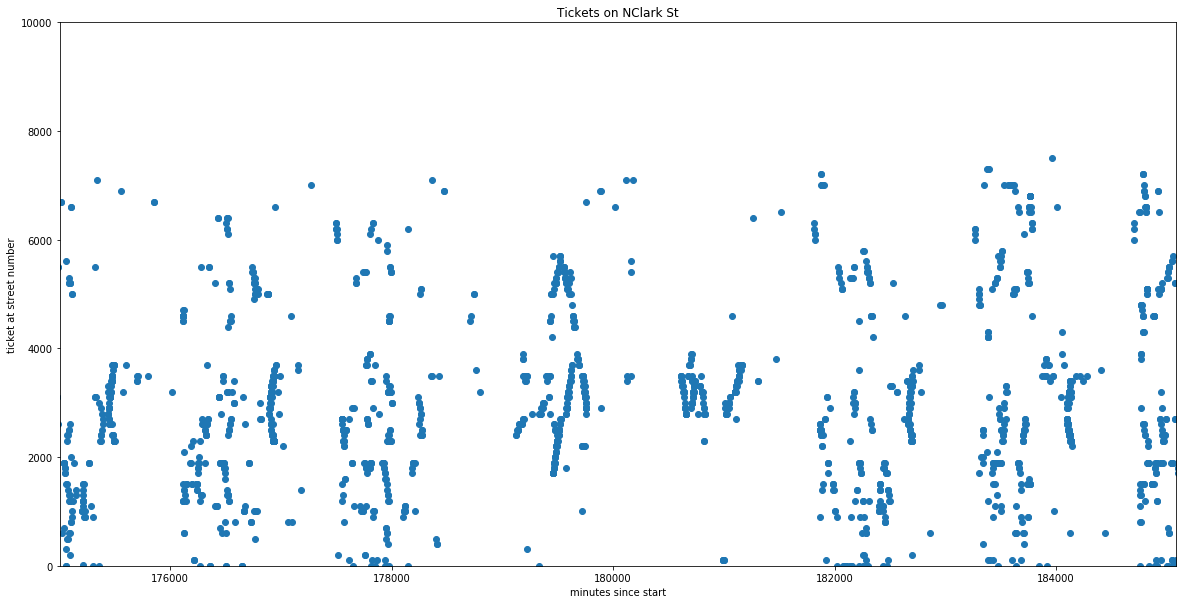

In [97]:
minute_start = 175000
total_time = 1440 * 7
minute_end = minute_start + total_time
plot_0 = All_Tickets_on_NClark.plot(x='minutes_since_start', y='block_number', style='o', figsize=(20,10), ylim=(0,10000), xlim = (minute_start, minute_end), legend = None)
plot_0.set_xlabel("minutes since start")
plot_0.set_ylabel("ticket at street number")
plot_0.set_title("Tickets on NClark St")
plt.savefig("parking_violation_by_time_on_NClark.pdf")

In [ ]:
print(NoParking_on_NClark.head())
print(ExpiredMeter_on_NClark.head())

In [ ]:
plot_1 = NoParking_on_NClark.plot.hist(bins = 80, figsize = (20,10), density = True, range=[0, 8e3])
plot_1.set_xlabel("Street number")
plt.savefig("parking_violation_by_street_number_on_NClark.pdf")

In [ ]:
plot_2 = ExpiredMeter_on_NClark.plot.hist(bins = 80, figsize = (20,10), density = True, range = [0, 8e3])
plot_2.set_xlabel("Street number")
plt.savefig("expired_meters_by_street_number_on_NClark.pdf")